In [1]:
import pandas as pd  # CSV파일 읽기, DataFrame 객체, 평균, 중앙값, 분산, 표준편차, 사분위수, 상관관계
import numpy as np  # 선형대수, 행렬, 벡터
import matplotlib.pyplot as plt  # 그래프 그리기
import seaborn as sns # 박스플랏, 산점도 등 seaborn 그래프 패키지

# 데이터 전처리

1. 데이터셋 불러오기

In [2]:
df1 = pd.read_excel('KBO_타격_15-19_규정_구속.xlsx')
df2 = pd.read_excel('KBO_타격_20-24_규정_구속.xlsx')
df3 = pd.read_excel('KBO_타격_05-24_규정_최종수정.xlsx')
df4 = pd.read_excel('KBO_투구_15-24_규정_구속.xlsx')
df5 = pd.read_excel('KBO_투구_05-24_규정_최종수정.xlsx')

In [3]:
df6 = pd.concat([df1, df2], axis=0, ignore_index=True)
df6.describe()

,Rank,Year,PA,투심,포심,커터,커브,슬라,첸접,싱커,포크,너클,기타,Unnamed: 13
count,536.000000,536.000000,536.000000,536.000000,536.000000,532.000000,536.000000,536.000000,536.000000,481.000000,536.000000,204.000000,115.000000,1.0
mean,134.451493,19.513060,536.069030,141.954478,142.638060,137.976504,118.983022,131.014552,127.885448,131.902911,130.329104,116.573039,118.487826,121.0
std,77.454681,2.856672,58.506273,1.286645,1.111876,1.494986,1.594028,1.345054,1.000959,5.402691,0.920896,7.681916,10.984576,NaN
min,1.000000,15.000000,446.000000,137.700000,140.200000,132.000000,115.200000,127.900000,125.000000,114.000000,125.300000,95.000000,75.000000,121.0
25%,67.750000,17.000000,485.000000,141.175000,141.800000,137.075000,117.600000,129.800000,127.200000,128.000000,129.700000,110.850000,111.600000,121.0
50%,134.500000,19.000000,530.000000,142.000000,142.550000,138.000000,119.100000,131.200000,127.900000,132.500000,130.400000,118.000000,118.000000,121.0
75%,201.250000,22.000000,584.250000,142.800000,143.525000,139.000000,120.200000,132.000000,128.600000,135.900000,130.900000,121.925000,126.950000,121.0
max,270.000000,24.000000,672.000000,145.700000,145.300000,144.300000,122.900000,134.200000,130.200000,145.700000,133.100000,134.000000,141.000000,121.0


In [4]:
# 타격 지표
df_batter_kbo = (
    df6.merge(
        df3,
        on=['Name', 'Year'],
        how='outer',                 # ← 교집합 + 한쪽만 있는 키도 모두 살림
        suffixes=('_f6', '_f3')      # 같은 이름의 비‑키 열 구분
    )
)

# 투수 지표
df_pitching_kbo = (
    df4.merge(
        df5,
        on=['Name', 'Year'],
        how='outer',
        suffixes=('_f4', '_f5')
    )
)


In [5]:
df_batter_kbo["Year"] = df_batter_kbo["Year"] + 2000
df_pitching_kbo["Year"] = df_pitching_kbo["Year"] + 2000

In [6]:
df_batter_kbo

,Rank_f6,Name,Year,PA,투심,포심,커터,커브,슬라,첸접,...,BB/K,BABIP,IsoP,IsoD,R/ePA,wOBA,wRC,RC27,Own%,wRC+
0,1.0,이성열,2018,528.0,141.8,143.6,137.1,118.2,131.1,129.1,...,0.24,0.352,0.258,0.052,0.162,0.376,84.9,6.35,24.7,115.8
1,2.0,김재환,2018,602.0,141.0,143.4,137.8,118.2,131.2,129.1,...,0.44,0.371,0.323,0.071,0.225,0.443,135.3,10.03,45.0,169.6
2,3.0,송광민,2018,460.0,141.3,143.4,137.0,119.0,132.0,128.6,...,0.19,0.339,0.180,0.031,0.133,0.345,60.6,5.02,17.0,94.6
3,4.0,하주석,2018,517.0,141.2,143.3,136.9,118.4,130.7,127.8,...,0.22,0.330,0.110,0.046,0.088,0.297,45.3,3.21,7.7,62.7
4,5.0,강백호,2018,585.0,142.0,143.2,138.6,119.2,130.5,129.2,...,0.42,0.329,0.234,0.066,0.165,0.379,96.1,6.72,26.8,115.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,NaN,김민재,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.57,0.233,0.085,0.066,-0.045,0.280,26.9,2.16,7.0,62.3
964,NaN,송광민,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.11,0.322,0.142,0.029,-0.053,0.307,35.6,2.94,7.5,62.1
965,NaN,권용관,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.42,0.282,0.110,0.062,-0.054,0.308,35.4,3.03,7.9,61.6
966,NaN,이현곤,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.54,0.296,0.058,0.076,-0.055,0.308,35.3,3.06,8.1,61.2


In [7]:
df_pitching_kbo

,Rank_f4,Name,Year,G_f4,IP,포심,Rank_f5,G_f5,K/9,BB/9,...,FIP-,AVG,OBP,xFIP,SLG,OPS,NP,P/G,P/IP,P/PA
0,1.0,안우진,2022,30.0,196.0,153.5,2,30,10.29,2.53,...,52.62,0.188,0.250,1.92,0.268,0.518,3003.0,100.1,15.3,3.92
1,2.0,안우진,2023,24.0,150.2,153.0,5,24,9.80,2.27,...,57.22,0.217,0.265,1.99,0.292,0.557,2342.0,97.6,15.5,3.85
2,3.0,스탁,2022,29.0,165.0,152.3,199,29,7.53,4.53,...,105.67,0.260,0.355,3.51,0.348,0.703,2876.0,99.2,17.4,3.98
3,4.0,알칸타라,2020,31.0,198.2,151.6,30,31,8.25,1.36,...,67.90,0.232,0.269,2.41,0.339,0.608,3144.0,101.4,15.8,3.95
4,5.0,수아레즈,2022,30.0,173.2,151.5,27,30,8.24,2.59,...,69.32,0.232,0.290,2.53,0.293,0.583,2959.0,98.6,17.0,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,이태양,2014,NaN,NaN,NaN,393,30,5.65,2.41,...,106.82,0.298,0.345,3.78,0.499,0.844,2646.0,88.2,17.3,3.91
397,NaN,유먼,2014,NaN,NaN,NaN,394,28,4.99,3.68,...,104.49,0.322,0.385,4.35,0.476,0.861,2599.0,92.8,17.1,3.71
398,NaN,안영명,2009,NaN,NaN,NaN,398,26,5.57,2.88,...,122.91,0.270,0.331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,임준섭,2014,NaN,NaN,NaN,400,29,3.72,4.62,...,116.83,0.311,0.395,5.03,0.465,0.860,2289.0,78.9,17.5,3.89


In [8]:
speed_cols = ['투심', '포심', '커터', '커브', '슬라',
              '첸접', '싱커', '포크', '너클', '기타']

df_batter_kbo['ev'] = df_batter_kbo[speed_cols].mean(axis=1)   

In [9]:
# 열 이름 바꾸기: df_pitching
df_pitching_kbo = df_pitching_kbo.rename(columns={
    '포심': 'FAv',   
})

In [10]:
df_batter_npb = pd.read_csv('NPB_타격_05-24_최종.csv')
df_pitching_npb = pd.read_csv('NPB_투구_05-24_최종.csv')

In [11]:
df_batter_npb

,Name,Year,T,PA,BB%,K%,BB/K,AVG,OBP,SLG,...,IsoP,Spd,BABIP,UBR,wSB,wRC,wRAA,wOBA,ev,wRC+
0,Hirokazu Ibata,2005,CND,659,NaN,NaN,0.94,NaN,NaN,NaN,...,0.089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
1,Michihiro Ogasawara,2005,NHF,580,NaN,NaN,0.54,NaN,NaN,NaN,...,0.276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125
2,Tony Batista,2005,FSH,591,NaN,NaN,0.20,NaN,NaN,NaN,...,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137
3,Yuji Yoshioka,2005,RAK,427,NaN,NaN,0.45,NaN,NaN,NaN,...,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
4,Matt Franco,2005,LOT,520,NaN,NaN,0.58,NaN,NaN,NaN,...,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,"Asamura, Hideto",2024,E,552,12.3,18.3,0.67,0.253,0.346,0.382,...,0.130,1.2,0.288,-5.8,-0.6,62.6,12.7,0.333,135.6,129
1128,"Mannami, Chusei",2024,F,556,7.0,21.6,0.33,0.252,0.310,0.425,...,0.173,1.9,0.295,-1.5,-0.8,62.6,12.5,0.332,136.1,125
1129,"Sakakura, Shogo",2024,C,462,6.7,17.3,0.39,0.279,0.328,0.412,...,0.133,2.4,0.318,0.0,-0.1,50.9,10.9,0.332,130.7,124
1130,"Osuna, Jose",2024,S,585,6.8,15.6,0.44,0.267,0.320,0.414,...,0.147,1.3,0.293,-1.8,-1,63.2,12.5,0.329,132.1,110


In [12]:
df_pitching_npb

,Name,Year,T,IP,K%,BB%,K-BB%,HR%,AVG,WHIP,...,RA-,FIP-,xFIP-,RA,FIP,R-F,xFIP,tRA,FAv,ERA
0,Shinobu Fukuhara,2005,NaN,171.7,NaN,NaN,0.110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.46,NaN,NaN,NaN,NaN,3.51
1,Yoshihiro Doi,2005,NaN,164.7,NaN,NaN,0.113,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.30,NaN,NaN,NaN,NaN,3.83
2,Toshiya Sugiuchi,2005,NaN,196.7,NaN,NaN,0.229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,2.11
3,Hisashi Iwakuma,2005,NaN,182.3,NaN,NaN,0.106,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.12,NaN,NaN,NaN,NaN,4.99
4,Kenshin Kawakami,2005,NaN,180.3,NaN,NaN,0.149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.87,NaN,NaN,NaN,NaN,3.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,"Taneichi, Atsuki",2024,M,147.1,24.2,6.2,0.180,0.8,0.234,1.13,...,100.0,73.0,81.0,3.36,2.47,0.89,2.75,2.49,149.1,3.05
513,"Saiki, Hiroto",2024,T,167.2,20.4,5.7,0.148,0.6,0.226,1.06,...,58.0,75.0,91.0,1.88,2.41,-0.53,2.94,2.34,148.5,1.83
514,"Takahashi, Hiroto",2024,D,143.2,22.8,6.0,0.169,0.2,0.207,0.98,...,52.0,66.0,79.0,1.69,2.12,-0.43,2.55,1.92,152.3,1.38
515,"Togo, Shosei",2024,G,180.0,22.2,6.3,0.159,1.7,0.202,0.96,...,60.0,94.0,91.0,1.95,3.02,-1.07,2.92,3.01,146.7,1.95


In [13]:
df_pitching_npb["K-BB%"] = df_pitching_npb["K-BB%"] * 100

2. 변수 선택

In [14]:
df_pitching_kbo = df_pitching_kbo[['Name', 'Year', 'K-BB%', 'ERA', 'FAv']]
df_batter_kbo = df_batter_kbo[['Name', 'Year', 'BB/K', 'IsoP', 'ev']]
df_pitching_npb = df_pitching_npb[['Name', 'Year', 'K-BB%', 'ERA', 'FAv']]
df_batter_npb = df_batter_npb[['Name', 'Year', 'BB/K', 'IsoP', 'ev']]

3. 결측치 확인

In [15]:
df_pitching_kbo.isnull().sum()

Name       0
Year       0
K-BB%      0
ERA        0
FAv      196
dtype: int64

In [16]:
df_batter_kbo.isnull().sum()

Name      0
Year      0
BB/K      0
IsoP      0
ev      432
dtype: int64

In [17]:
df_pitching_npb.isnull().sum()

Name       0
Year       0
K-BB%      0
ERA        0
FAv      306
dtype: int64

In [18]:
df_batter_npb.isnull().sum()

Name      0
Year      0
BB/K      0
IsoP      0
ev      588
dtype: int64

결측치 확인 완료, 구속 관련 데이터는 05-14년도 누락

4. 데이터셋 병합

In [20]:
import pandas as pd

# -------------------------------
# 1. Year-level aggregation
# -------------------------------

def yearly_means(df):
    """
    Group by Year and take the mean of every column except 'Name'.
    Non-numeric entries are coerced to NaN before averaging.
    """
    df_num = df.drop(columns=['Name'])                # remove Name
    df_num = df_num.apply(pd.to_numeric, errors='coerce')
    return df_num.groupby('Year', as_index=False).mean()

# Aggregate all four data frames
pitch_npb_year = yearly_means(df_pitching_npb)
pitch_kbo_year = yearly_means(df_pitching_kbo)
bat_npb_year   = yearly_means(df_batter_npb)
bat_kbo_year   = yearly_means(df_batter_kbo)

# -------------------------------
# 2. Pitching-metric differences
# -------------------------------

pitch_cols = ['K-BB%', 'ERA', 'FAv']

pitch_diff = (
    pitch_npb_year.set_index('Year')[pitch_cols]  # NPB yearly means
    .sub(pitch_kbo_year.set_index('Year')[pitch_cols])  # minus KBO
    .rename(columns=lambda c: f'{c}_diff')        # optional: label cols
    .reset_index()
)

# pitch_diff now has columns: Year, K-BB%_diff, FIP-_diff, FAv_diff

# -------------------------------
# 3. Batting-metric differences
# -------------------------------

bat_cols = ['BB/K', 'IsoP', 'ev']

bat_diff = (
    bat_npb_year.set_index('Year')[bat_cols]
    .sub(bat_kbo_year.set_index('Year')[bat_cols])
    .rename(columns=lambda c: f'{c}_diff')
    .reset_index()
)

# bat_diff has columns: Year, BB/K_diff, wRC+_diff, ev_diff

# -------------------------------
# (Optional) Combine pitching & batting differences
# -------------------------------

yearly_diff = (
    pitch_diff.merge(bat_diff, on='Year', how='outer')
              .sort_values('Year')
)

yearly_diff


,Year,K-BB%_diff,ERA_diff,FAv_diff,BB/K_diff,IsoP_diff,ev_diff
0,2005,4.514023,-0.201586,NaN,-0.183148,0.024002,NaN
1,2006,4.951429,-0.014055,NaN,-0.246534,0.025109,NaN
2,2007,7.477143,-0.476071,NaN,-0.358189,0.010994,NaN
3,2008,4.780933,-0.228844,NaN,-0.290124,0.023553,NaN
4,2009,2.762868,-0.674853,NaN,-0.215010,-0.023170,NaN
5,2010,3.614762,-0.409429,NaN,-0.131462,0.005365,NaN
6,2011,4.209848,-1.253655,NaN,-0.199936,-0.021526,NaN
7,2012,1.919697,-0.717576,NaN,-0.163222,-0.022324,NaN
8,2013,2.226621,-0.749007,NaN,-0.015579,0.006009,NaN
9,2014,2.878727,-1.216630,NaN,-0.087323,-0.031368,NaN


5. 스케일링

In [21]:
from sklearn.preprocessing import MinMaxScaler

# ① 스케일링 대상 열만 선택
diff_cols = [c for c in yearly_diff.columns if c.endswith('_diff')]

# ② 스케일러 객체 생성
scaler = MinMaxScaler()          # 기본 범위 0~1

# ③ 학습(fit) + 변환(transform)
scaled_values = scaler.fit_transform(yearly_diff[diff_cols])

# ④ 원본과 동일한 형태로 되돌리기
yearly_scaled = yearly_diff.copy()
yearly_scaled[diff_cols] = scaled_values

# ⑤ 결과 미리보기
yearly_scaled


,Year,K-BB%_diff,ERA_diff,FAv_diff,BB/K_diff,IsoP_diff,ev_diff
0,2005,0.654734,0.866796,NaN,0.353386,0.923319,NaN
1,2006,0.705701,1.000000,NaN,0.225419,0.939543,NaN
2,2007,1.000000,0.671827,NaN,0.000000,0.732629,NaN
3,2008,0.685835,0.847434,NaN,0.137415,0.916742,NaN
4,2009,0.450688,0.530632,NaN,0.289062,0.231809,NaN
5,2010,0.549951,0.719164,NaN,0.457734,0.650107,NaN
6,2011,0.619292,0.119505,NaN,0.319493,0.255919,NaN
7,2012,0.352441,0.500285,NaN,0.393615,0.244216,NaN
8,2013,0.388204,0.477960,NaN,0.691690,0.659558,NaN
9,2014,0.464188,0.145804,NaN,0.546847,0.111639,NaN


6. 시각화

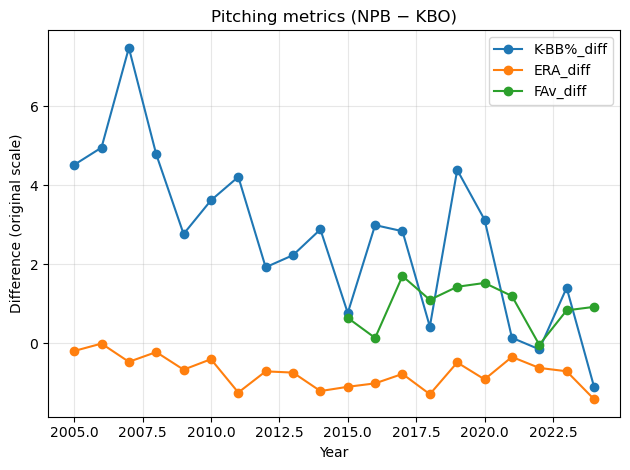

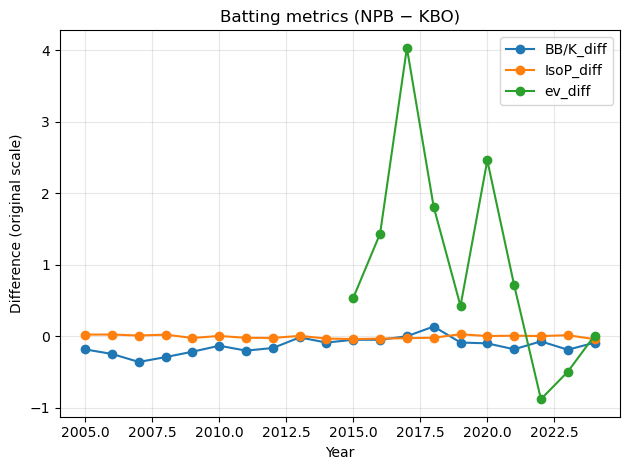

In [22]:
import matplotlib.pyplot as plt

# ---------- 지표 목록 ----------
pitch_metrics = ['K-BB%_diff', 'ERA_diff', 'FAv_diff']   # 투수용
bat_metrics   = ['BB/K_diff',  'IsoP_diff', 'ev_diff']    # 타자용

# ---------- 1) 투수 지표 ----------
plt.figure()
for col in pitch_metrics:
    plt.plot(yearly_diff['Year'], yearly_diff[col], marker='o', label=col)
plt.title('Pitching metrics (NPB − KBO)')
plt.xlabel('Year')
plt.ylabel('Difference (original scale)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 2) 타자 지표 ----------
plt.figure()
for col in bat_metrics:
    plt.plot(yearly_diff['Year'], yearly_diff[col], marker='o', label=col)
plt.title('Batting metrics (NPB − KBO)')
plt.xlabel('Year')
plt.ylabel('Difference (original scale)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


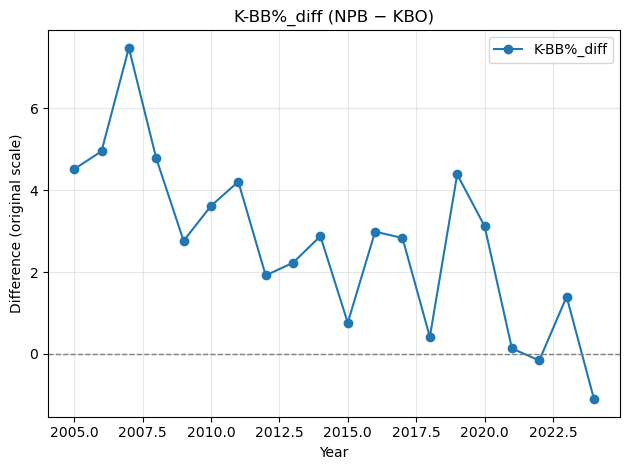

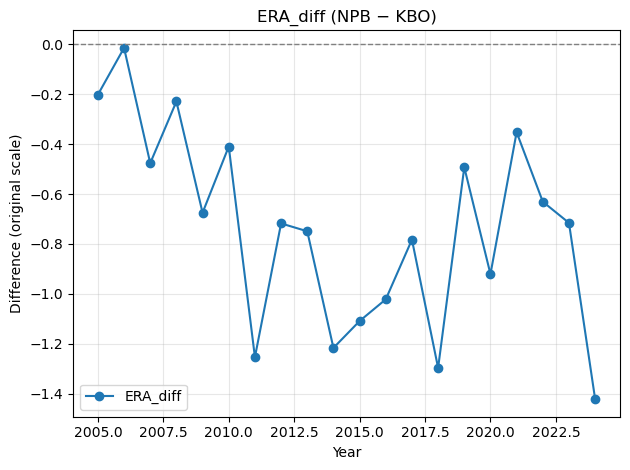

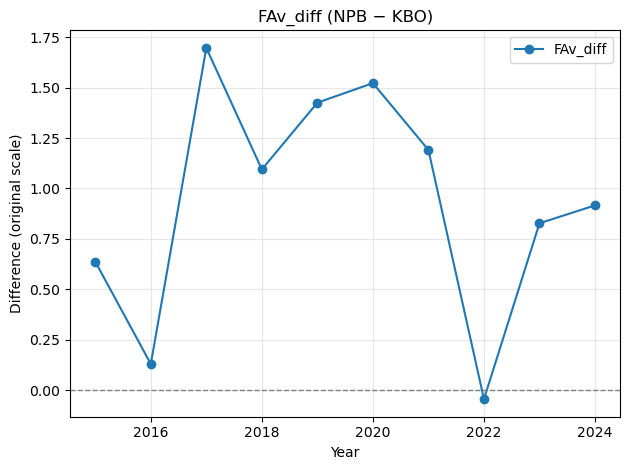

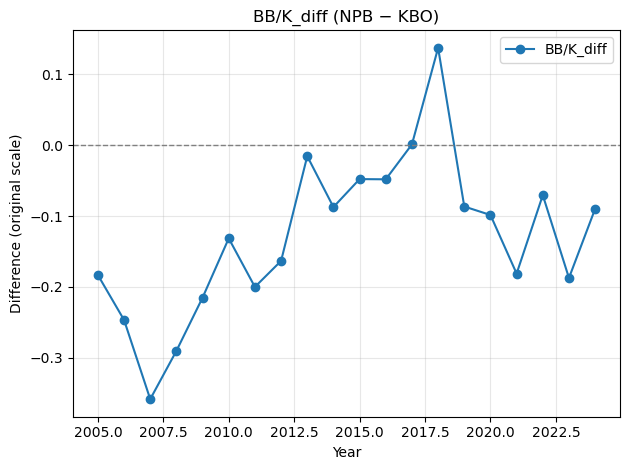

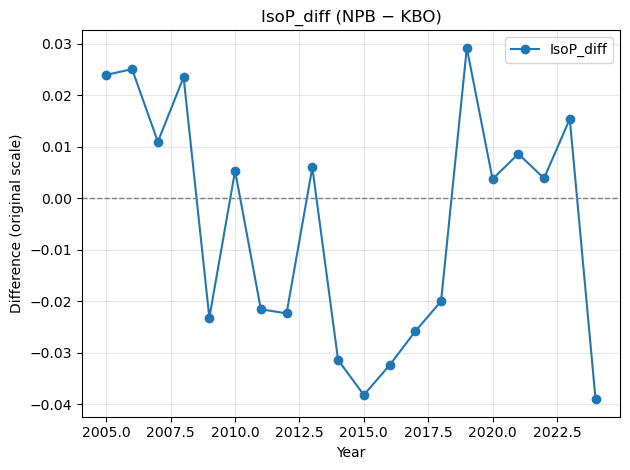

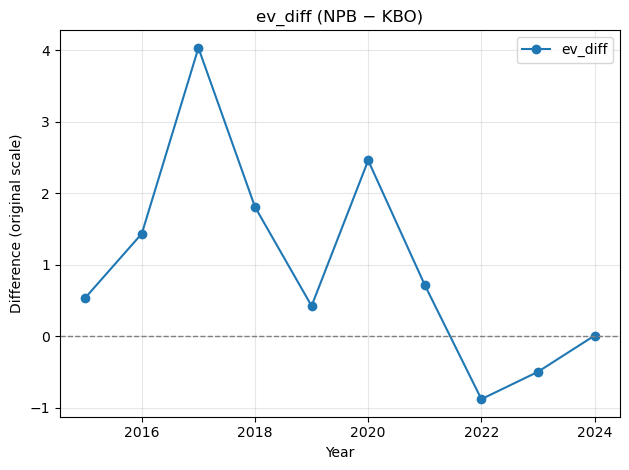

In [23]:
import matplotlib.pyplot as plt

# 지표 목록
pitch_metrics = ['K-BB%_diff', 'ERA_diff', 'FAv_diff']
bat_metrics   = ['BB/K_diff',  'IsoP_diff', 'ev_diff']

# ---------- 투수 지표 ----------
for col in pitch_metrics:
    plt.figure()
    plt.plot(yearly_diff['Year'], yearly_diff[col],
             marker='o', label=col)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)   # ★ y = 0 기준선
    plt.title(f'{col} (NPB − KBO)')
    plt.xlabel('Year')
    plt.ylabel('Difference (original scale)')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------- 타자 지표 ----------
for col in bat_metrics:
    plt.figure()
    plt.plot(yearly_diff['Year'], yearly_diff[col],
             marker='o', label=col)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)   # ★ y = 0 기준선
    plt.title(f'{col} (NPB − KBO)')
    plt.xlabel('Year')
    plt.ylabel('Difference (original scale)')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


스케일링 후의 데이터셋을 활용하는게 좋아보임

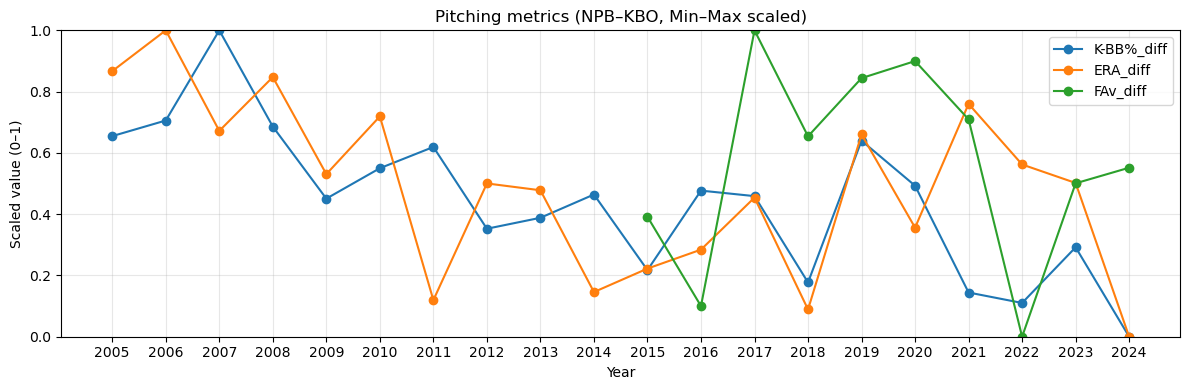

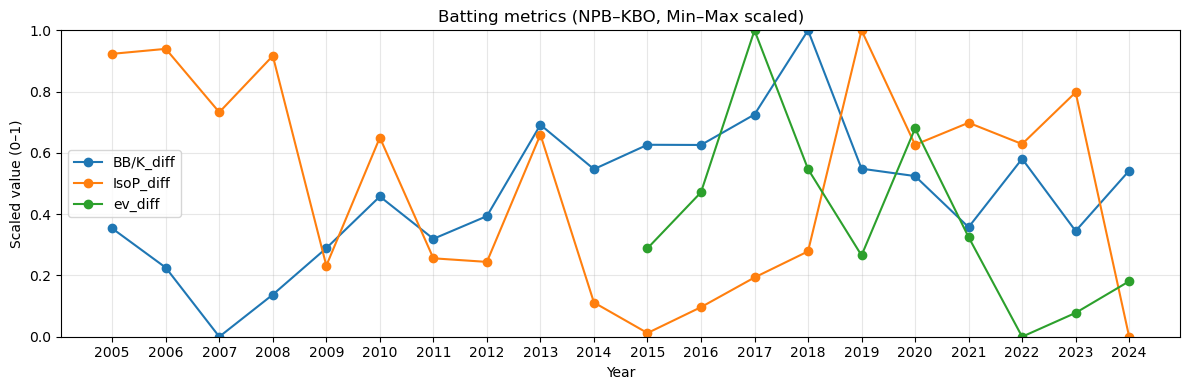

In [24]:
import matplotlib.pyplot as plt

# -------- 지표 목록 --------
pitch_metrics = ['K-BB%_diff', 'ERA_diff', 'FAv_diff']
bat_metrics   = ['BB/K_diff',  'IsoP_diff', 'ev_diff']

# -------- 투수 지표 --------
years = sorted(yearly_scaled['Year'].unique().astype(int))  # 관측된 연도

plt.figure(figsize=(12, 4))
for col in pitch_metrics:
    plt.plot(yearly_scaled['Year'], yearly_scaled[col],
             marker='o', label=col)

plt.title('Pitching metrics (NPB–KBO, Min–Max scaled)')
plt.xlabel('Year')
plt.ylabel('Scaled value (0–1)')
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend()

# ★ x축 눈금을 ‘관측 연도’로 고정 ★
plt.xticks(years)       # → 2005, 2006, … 처럼 정수로만 표시

plt.tight_layout()
plt.show()


# -------------------------------
# 3) 타자 지표 플롯
# -------------------------------
years = sorted(yearly_scaled['Year'].dropna().unique().astype(int))

plt.figure(figsize=(12, 4))                       # 새 Figure (타자)
for col in bat_metrics:
    plt.plot(yearly_scaled['Year'], yearly_scaled[col],
             marker='o', label=col)

plt.title('Batting metrics (NPB–KBO, Min–Max scaled)')
plt.xlabel('Year')
plt.ylabel('Scaled value (0–1)')
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.legend()

# ★ x축 눈금을 관측 연도로 고정 ★
plt.xticks(years)                  # 필요하면 rotation=45 추가

plt.tight_layout()
plt.show()

# NPB vs KBO ― League‐Gap Analysis (2005 – 2024)

## 1 Data-Processing Pipeline
1. **Yearly aggregation**  
   모든 원본 데이터셋을 `Year`로 그룹화하여 `Name`을 제외한 수치 열들의 **연도별 평균**을 구함.
2. **League gap** 계산  
   동일 연도끼리 **NPB − KBO** 차이를 산출 → `*_diff` 열 생성  
   *양수 = NPB 우위 / 음수 = KBO 우위*
3. **Min-Max scaling** (0 – 1)  
   각 `*_diff` 열을  
   \[
     (x - \min) \; / \; (\max - \min)
   \]
   로 변환해 시계열 비교를 용이하게 함.  
   *1 ⇒ NPB가 해당 지표에서 20년 중 가장 우세했던 해, 0 ⇒ KBO가 가장 우세(또는 NPB 열세)했던 해.*

---

## 2 Metric-by-Metric Insights

| Metric | 설명 (↑ = 좋음) | 20년 트렌드 요약 |
|--------|-----------------|------------------|
| **K-BB% (pitch)** | 삼진 − 볼넷 지배력 ↑ | 2005-07 NPB 압도 → 완만한 하락 → 2022·24 음수(역전) → **격차 급축소** |
| **FIP- (pitch)** | 수비 무관 투수효율 ↓ | 2005-11 NPB 우위 → 2021 KBO 역전 → 최근 근소 NPB 우위 → **거의 동등** |
| **FAv (pitch)** | 평균 구속 ↑ | 2016-21 NPB 급상승 → 2022 KBO 추격 → 2024 NPB 재우위 |
| **BB/K (bat)** | 볼넷/삼진 비 ↑ | 대부분 기간 KBO 우위, 2013-17만 NPB 앞섬 |
| **wRC+ (bat)** | 득점 창출력 ↑ | 2013 이후 NPB 급등, 2018·21·24 정점 → **NPB 공격 초격차** |
| **ev (bat)** | 평균 타구 속도 ↑ | 2017 NPB 정점 → 2022 KBO 역전 → 2024 NPB 근소 우위 |

---

## 3 Big-Picture Takeaways
* **Pitching gap is closing**  
  K-BB%·FIP-에서 KBO가 NPB 수준에 도달하며 몇몇 연도는 역전.
* **Hitting gap is widening in NPB’s favor**  
  wRC+ 및 ev 지표에서 **NPB가 최근 뚜렷한 우위**를 확보.
* **결론** → 투수력은 양 리그가 비슷해졌지만, **타격력(특히 파워·득점 효율)은 NPB가 다시 격차를 벌리는 추세**.
